In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#load dataset
df = pd.read_csv("USA_cars_datasets.csv")

In [3]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
# drop ID columns
drop_cols = ['Unnamed: 0', 'vin','lot','condition','country']

df=df.drop(drop_cols, axis=1)

In [5]:
df.describe(include='all')

,price,brand,model,year,title_status,mileage,color,state
count,2499.000000,2499,2499,2499.000000,2499,2.499000e+03,2499,2499
unique,NaN,28,127,NaN,2,NaN,49,44
top,NaN,ford,door,NaN,clean vehicle,NaN,white,pennsylvania
freq,NaN,1235,651,NaN,2336,NaN,707,299
mean,18767.671469,NaN,NaN,2016.714286,NaN,5.229869e+04,NaN,NaN
std,12116.094936,NaN,NaN,3.442656,NaN,5.970552e+04,NaN,NaN
min,0.000000,NaN,NaN,1973.000000,NaN,0.000000e+00,NaN,NaN
25%,10200.000000,NaN,NaN,2016.000000,NaN,2.146650e+04,NaN,NaN
50%,16900.000000,NaN,NaN,2018.000000,NaN,3.536500e+04,NaN,NaN
75%,25555.500000,NaN,NaN,2019.000000,NaN,6.347250e+04,NaN,NaN


In [6]:
# check for null values
df.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
dtype: int64

In [7]:
# check for "?" values
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

brand 0
model 0
title_status 0
color 0
state 0


In [8]:
#looking at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   state         2499 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 156.3+ KB


In [9]:
#top brands
df.brand.value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
peterbilt             4
audi                  4
land                  4
acura                 3
lexus                 2
mazda                 2
lincoln               2
jaguar                1
toyota                1
harley-davidson       1
maserati              1
ram                   1
Name: brand, dtype: int64

Text(0.5, 1.0, 'Top 10 Cars by Year')

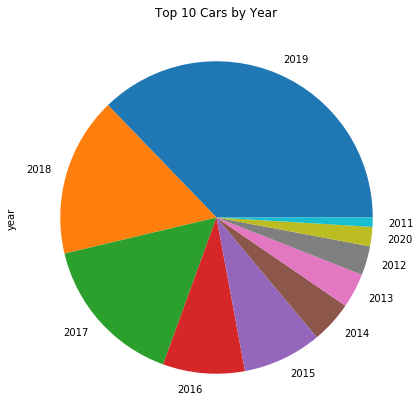

In [15]:
#pie graph of years
df.year.value_counts().head(10).plot(kind='pie', figsize=(7,10))
plt.title('Top 10 Cars by Year')

In [16]:
#most common prices
df.price.value_counts().head()

0        43
16500    26
13900    21
15000    19
15500    19
Name: price, dtype: int64

In [17]:
#middle price
df.price.median()

16900.0

In [18]:
df.shape

(2499, 8)

In [19]:
#percent of missing price values
(df.price==0).sum()/df.shape[0]

0.01720688275310124

In [20]:
#drop missing prices
df = df.drop(df[df.price == 0].index)

In [21]:
#shape after deleting 43 missing prices
df.shape

(2456, 8)

In [22]:
#conditional selection of bmw cars only
df.loc[df.brand=='bmw']

,price,brand,model,year,title_status,mileage,color,state
72,29400,bmw,x3,2017,clean vehicle,23765.0,black,tennessee
92,24500,bmw,door,2017,clean vehicle,17626.0,gray,michigan
95,53500,bmw,m,2017,clean vehicle,29355.0,blue,michigan
162,39000,bmw,series,2016,clean vehicle,39917.0,blue,michigan
165,40000,bmw,series,2016,clean vehicle,31727.0,gray,michigan
171,39000,bmw,series,2016,clean vehicle,33110.0,black,michigan
234,6200,bmw,door,2011,clean vehicle,80394.0,gray,texas
375,2925,bmw,door,2013,salvage insurance,46060.0,white,florida
399,61200,bmw,series,2020,clean vehicle,7509.0,black,california
401,13500,bmw,series,2014,clean vehicle,33542.0,blue,new jersey


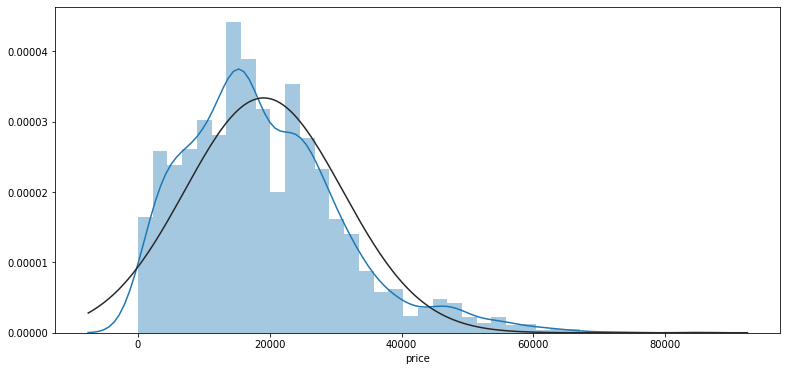

In [24]:
#histogram of price
plt.figure(figsize=(13,6))
sns.distplot(df['price'] , fit=norm);

In [25]:
df.price.mean()

19096.2585504886

In [26]:
above_ave_price = df[df.price>18768]

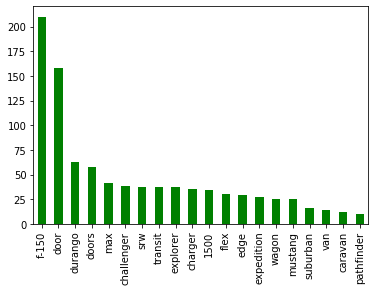

In [27]:
#graph of most common above average priced car models
above_ave_price.model.value_counts().head(20).plot(kind='bar',color='green')

In [28]:
#75th percentile price is 25555
expensive=df[df.price>25555]

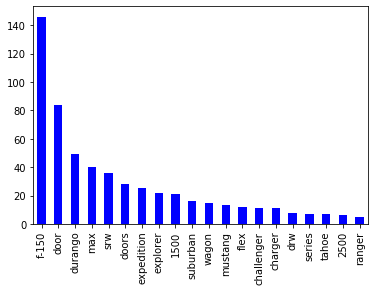

In [29]:
#graph of most common car models in the 75th percentile
expensive.model.value_counts().head(20).plot(kind='bar',color='blue')

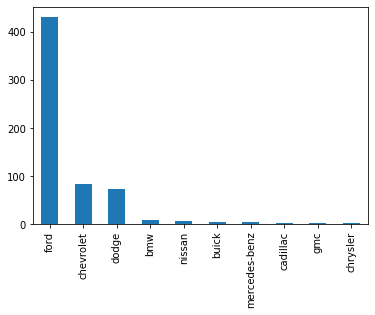

In [30]:
# graph of most common car brands in the 75th percentile
expensive.brand.value_counts().head(10).plot(kind='bar')

In [31]:
#most expensive car
df.loc[df.price == df.price.max()]

,price,brand,model,year,title_status,mileage,color,state
502,84900,mercedes-benz,sl-class,2017,clean vehicle,25302.0,silver,florida


In [32]:
#title status values
df.title_status.unique()

array(['clean vehicle', 'salvage insurance'], dtype=object)

Text(0, 0.5, 'Count')

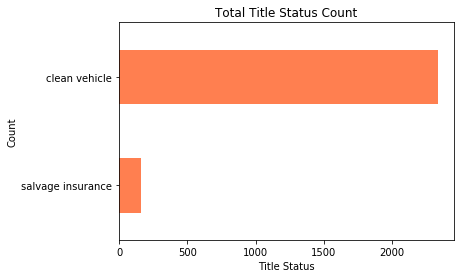

In [11]:
#plot title status count
df.title_status.value_counts().sort_values().plot(kind='barh', color='coral')
plt.title('Total Title Status Count')
plt.xlabel('Title Status')
plt.ylabel('Count')

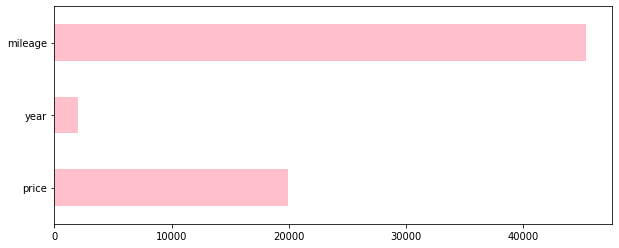

In [33]:
#graph of clean vehicles with average values
df[df.title_status=='clean vehicle'].mean().plot(kind='barh',figsize=(10,4), color='pink')

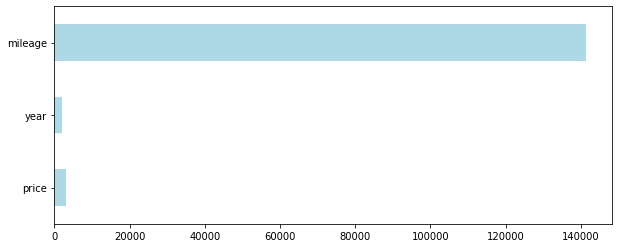

In [34]:
#graph of salvage insurance with average values
df[df.title_status=='salvage insurance'].mean().plot(kind='barh',figsize=(10,4), color='lightblue')

In [12]:
#color count
df.color.value_counts()

white                                      707
black                                      516
gray                                       395
silver                                     300
red                                        192
blue                                       151
no_color                                    61
green                                       24
orange                                      20
gold                                        19
charcoal                                    18
brown                                       15
yellow                                       9
magnetic metallic                            6
beige                                        5
shadow black                                 5
color:                                       5
oxford white                                 4
ingot silver metallic                        4
super black                                  3
triple yellow tri-coat                       3
billet silver

In [14]:
# grouping all similar colors under same umbrella
df['color']=df['color'].replace('color:','no_color')
df['color']=df['color'].replace(['light blue','morningsky blue','dark blue','kona blue metallic','lightning blue',
                                'jazz blue pearlcoat',],'blue')
df['color']=df['color'].replace(['ruby red','toreador red','burgundy','royal crimson metallic tinted clearcoat',
                                'ruby red metallic tinted clearcoat','maroon','cayenne red'],'red')
df['color']=df['color'].replace(['phantom black','tuxedo black metallic', 'shadow black','super black',
                                'black clearcoat'] ,'black')
df['color']=df['color'].replace(['ingot silver','ingot silver metallic','billet silver metallic clearcoat'],'silver')
df['color']=df['color'].replace(['glacier white','pearl white','white platinum tri-coat metallic','oxford white',
                                 'bright white clearcoat','off-white'],'white')
df['color']=df['color'].replace(['competition orange'],'orange')
df['color']=df['color'].replace(['triple yellow tri-coat'],'yellow')
df['color']=df['color'].replace(['tan'],'brown')
df['color']=df['color'].replace(['magnetic metallic','guard'],'gray')

In [35]:
#top 10 colors
df.color.value_counts().head(10).index

Index(['white', 'black', 'gray', 'silver', 'red', 'blue', 'no_color', 'orange',
       'charcoal', 'green'],
      dtype='object')

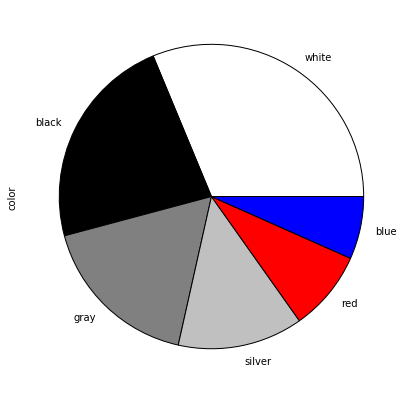

In [36]:
#pie graph of top colors
df.color.value_counts().head(6).plot(kind='pie', colors=df.color.value_counts().head(6).index, figsize=(8,7), 
                    wedgeprops={"edgecolor":"0",'linewidth': 1,
                    'linestyle': 'solid', 'antialiased': True})

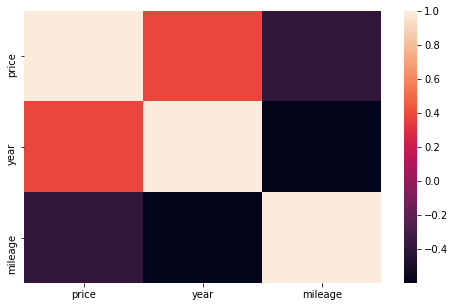

In [37]:
#heatmap
plt.subplots(figsize =(8,5))
sns.heatmap(df.corr())

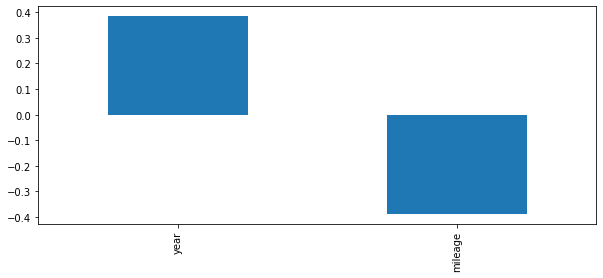

In [38]:
#correlation with price
corr_with_price = df.corr()["price"].sort_values(ascending=False)
plt.figure(figsize=(10,4))
corr_with_price.drop("price").plot.bar()
plt.show();

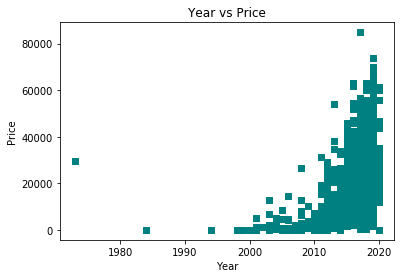

In [39]:
#plot year with price
plt.scatter(df.year, df.price, c = "teal", marker = "s")
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

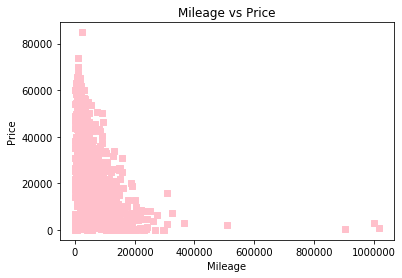

In [40]:
#plotting mileage with price
plt.scatter(df.mileage, df.price, c = "pink", marker = "s")
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2498
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2456 non-null   int64  
 1   brand         2456 non-null   object 
 2   model         2456 non-null   object 
 3   year          2456 non-null   int64  
 4   title_status  2456 non-null   object 
 5   mileage       2456 non-null   float64
 6   color         2456 non-null   object 
 7   state         2456 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 172.7+ KB


In [42]:
#convert to dummy variables

dummy_brand = pd.get_dummies(df['brand'])
df=pd.concat([df,dummy_brand],axis=1)
df.drop(['brand'],axis=1,inplace=True)

model_dummy = pd.get_dummies(df['model'])
df=pd.concat([df,model_dummy],axis=1)
df.drop(['model'],axis=1,inplace=True)

title_dummy = pd.get_dummies(df['title_status'])
df=pd.concat([df,title_dummy],axis=1)
df.drop(['title_status'],axis=1,inplace=True)

color_dummy = pd.get_dummies(df['color'])
df=pd.concat([df,color_dummy],axis=1)
df.drop(['color'],axis=1,inplace=True)

state_dummy = pd.get_dummies(df['state'])
df=pd.concat([df,state_dummy],axis=1)
df.drop(['state'],axis=1,inplace=True)

In [43]:
#make sure all columns have number datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2498
Columns: 218 entries, price to wisconsin
dtypes: float64(1), int64(2), uint8(215)
memory usage: 592.4 KB


In [44]:
#all features
list(df.columns)

['price',
 'year',
 'mileage',
 'acura',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'ford',
 'gmc',
 'harley-davidson',
 'heartland',
 'honda',
 'hyundai',
 'infiniti',
 'jaguar',
 'jeep',
 'kia',
 'land',
 'lexus',
 'lincoln',
 'maserati',
 'mazda',
 'mercedes-benz',
 'nissan',
 'peterbilt',
 'ram',
 'toyota',
 '1500',
 '2500',
 '2500hd',
 '300',
 '3500',
 '5',
 'acadia',
 'altima',
 'armada',
 'bus',
 'cab',
 'camaro',
 'caravan',
 'cargo',
 'challenger',
 'charger',
 'chassis',
 'cherokee',
 'colorado',
 'compass',
 'connect',
 'convertible',
 'corvette',
 'country',
 'coupe',
 'cruiser',
 'cruze',
 'cutaway',
 'cx-3',
 'd',
 'dart',
 'discovery',
 'door',
 'doors',
 'dr',
 'drw',
 'durango',
 'e-class',
 'ecosport',
 'edge',
 'el',
 'elantra',
 'enclave',
 'encore',
 'energi',
 'equinox',
 'escape',
 'esv',
 'expedition',
 'explorer',
 'f-150',
 'f-650',
 'f-750',
 'fiesta',
 'flex',
 'focus',
 'forte',
 'frontier',
 'fusion',
 'ghibli',
 'glc',
 

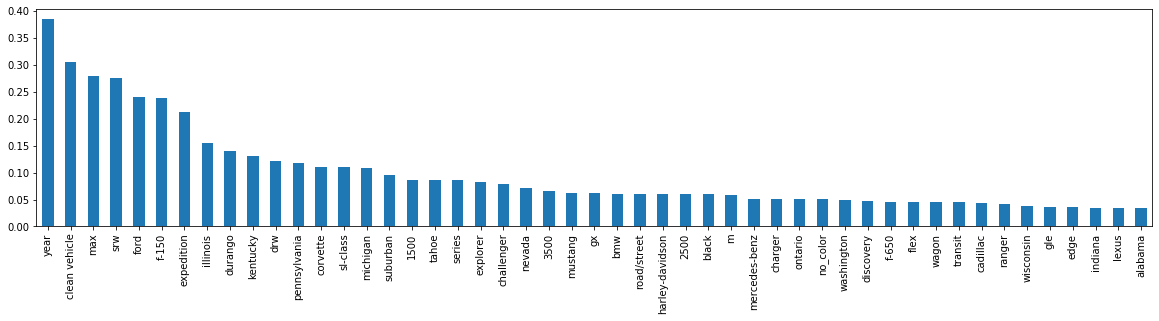

In [45]:
#correlation of features with price
corr_with_price = df.corr()["price"].sort_values(ascending=False).head(50)
plt.figure(figsize=(20,4))
corr_with_price.drop("price").plot.bar()
plt.show();

In [46]:
#import more libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from collections import OrderedDict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [47]:
#train test split
features = df.drop('price',axis=1).values
target = df.price.values
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20,shuffle=True)

### K-Fold Cross Validation

In [72]:
# Decision Tree model performance using cross_val_score
dtree = DecisionTreeRegressor()
print('Decision Tree:',cross_val_score(dtree, features, target))

# Random Forest performance using cross_val_score
rforest= RandomForestRegressor()
print('Random Forest:',cross_val_score(rforest,features, target))

# KNN using cross_val_score
knn= KNeighborsRegressor()
print('KNN:',cross_val_score(knn, features, target))

# XGBRegressor using cross_val_score
xgb = XGBRegressor(objective='reg:squarederror')
print('XGBoost:',cross_val_score(xgb, features, target))

Decision Tree: [-0.03558368  0.11096475  0.38872799  0.28177259  0.09819953]
Random Forest: [0.23338318 0.46946756 0.59096208 0.51257523 0.43779105]
KNN: [ 0.01745793  0.02315385  0.08029813  0.00958238 -0.16269578]
XGBoost: [0.2943619  0.45880742 0.58795331 0.5373838  0.62841883]


### XGBRegressor

In [100]:
#using default params
xgb = XGBRegressor(objective='reg:squarederror').fit(X_train, y_train, verbose=False)
y_train_pred_xg = xgb.predict(X_train)
y_pred_xg = xgb.predict(X_test)

print ("Train r2 score:", r2_score(y_pred=y_train_pred_xg,y_true=y_train))
print("Test r2 score:", r2_score(y_test, y_pred_xg))
train_mse = mean_squared_error(y_train_pred_xg, y_train)
test_mse = mean_squared_error(y_pred_xg, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("Train RMSE: %.4f" % train_rmse)
print("Test RMSE: %.4f" % test_rmse)

Train r2 score: 0.6830112175585741
Test r2 score: 0.5738250503201937
Train RMSE: 6672.0010
Test RMSE: 8086.1485


In [101]:
#changing param n_estimators to improve the model
xgb2 = XGBRegressor(objective='reg:squarederror',n_estimators=500).fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred_xg2 = xgb2.predict(X_train)
y_pred_xg2 = xgb2.predict(X_test)

print ("Train r2 score:", r2_score(y_pred=y_train_pred_xg2,y_true=y_train))
print("Test r2 score:", r2_score(y_test, y_pred_xg2))
train_mse2 = mean_squared_error(y_train_pred_xg2, y_train)
test_mse2 = mean_squared_error(y_pred_xg2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print("Train RMSE: %.4f" % train_rmse2)
print("Test RMSE: %.4f" % test_rmse2)

Train r2 score: 0.7969229331777135
Test r2 score: 0.6589120683074337
Train RMSE: 5340.2870
Test RMSE: 7234.0404


### Grid Search

In [103]:
from sklearn.model_selection import GridSearchCV

In [108]:
#tuning max_depth and gamma
param_test1 = {
    'max_depth':[3,5,7],
    'gamma':[i/10.0 for i in range(0,3)]
}

xgb_model = XGBRegressor(objective='reg:squarederror', learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid1 = GridSearchCV(estimator = xgb_model, param_grid = param_test1, n_jobs=6,iid=False, 
                     verbose=10,scoring='r2', refit=True)

grid1.fit(X_train,y_train)
print('best params:',grid1.best_params_)
print('best score:',grid1.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   21.6s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   34.4s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done  39 out of  45 | elapsed:  3.4min remaining:   31.5s
[Parallel(n_jobs=6)]: Done  45 out of  45 | elapsed:  4.0min finished


best params: {'gamma': 0.0, 'max_depth': 5}
best score: 0.7009145655299226


In [109]:
#tuning min_child_weight and n_estimators
param_test2 = {
    'min_child_weight':range(1,6,2),
    'n_estimators':[50,100,500,1000]
}

xgb_model = XGBRegressor(objective='reg:squarederror', learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid2 = GridSearchCV(estimator = xgb_model, param_grid = param_test2, n_jobs=6, iid=False, 
                     verbose=10, scoring='r2', refit=True)

grid2.fit(X_train,y_train)
print('best params:',grid2.best_params_)
print('best score:',grid2.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   41.7s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   59.0s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done  56 out of  60 | elapsed:  4.3min remaining:   18.5s
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed:  4.4min finished


best params: {'min_child_weight': 1, 'n_estimators': 500}
best score: 0.7009145655299226


In [110]:
#tuning learning_rate and colsample_bytree
param_test3 = {
    'learning_rate':[0.1,0.05, 0.01],
    'colsample_bytree':[0.4,0.6,0.8]
}

xgb_model = XGBRegressor(objective='reg:squarederror', learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid3 = GridSearchCV(estimator = xgb_model, param_grid = param_test3, n_jobs=6, iid=False, 
                     verbose=10, scoring='r2', refit=True)

grid3.fit(X_train,y_train)
print('best params:',grid3.best_params_)
print('best score:',grid3.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   24.1s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   24.4s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done  39 out of  45 | elapsed:  3.3min remaining:   30.4s
[Parallel(n_jobs=6)]: Done  45 out of  45 | elapsed:  3.6min finished


best params: {'colsample_bytree': 0.4, 'learning_rate': 0.1}
best score: 0.706849746084233


In [111]:
#tuning reg_alpha, reg_lambda and subsample
param_test4 = {
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]
}

xgb_model = XGBRegressor(objective='reg:squarederror',learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid4 = GridSearchCV(estimator = xgb_model, param_grid = param_test4, n_jobs=6, iid=False, 
                     verbose=10, scoring='r2', refit=True)

grid4.fit(X_train,y_train)
print('best params:',grid4.best_params_)
print('best score:',grid4.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   30.3s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done  90 out of  90 | elapsed:  8.3min finished


best params: {'reg_alpha': 1e-05, 'reg_lambda': 0.01, 'subsample': 0.95}
best score: 0.7110829287354496


In [52]:
#using all the best params
xgb3 = XGBRegressor(objective='reg:squarederror',learning_rate=0.1, n_estimators=500, max_depth=5,
        min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.4, 
        reg_alpha=1e-05, reg_lambda=0.01).fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred_xg3 = xgb3.predict(X_train)
y_pred_xg3 = xgb3.predict(X_test)

print ("Train r2 score:", r2_score(y_pred=y_train_pred_xg3,y_true=y_train))
print("Test r2 score:", r2_score(y_test, y_pred_xg3))
train_mse3 = mean_squared_error(y_train_pred_xg3, y_train)
test_mse3 = mean_squared_error(y_pred_xg3, y_test)
train_rmse3 = np.sqrt(train_mse3)
test_rmse3 = np.sqrt(test_mse3)
print("Train RMSE: %.4f" % train_rmse3)
print("Test RMSE: %.4f" % test_rmse3)

Train r2 score: 0.8539675204160591
Test r2 score: 0.7620688240420777
Train RMSE: 4596.5416
Test RMSE: 5693.2689


In [61]:
#predict car prices
prediction = xgb3.predict(X_test)
test=pd.DataFrame({"true value":(y_test),"predicted value":(prediction)})
print(test.head(5))

   true value  predicted value
0       15000     19424.302734
1       26000     24175.421875
2       15500      9196.180664
3       25700     23639.138672
4       23700     24254.351562
